In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gpplot as gpp
import anchors
from poola import core as pool

import core_functions as fns

gpp.set_aesthetics(palette='Set2')


## Functions 

In [21]:
#Control distributions
def control_dist_plot(chip_lfc, control_name, filename, gene_col = 'Gene Symbol', initial_id=None, res_id=None, paired_cols=None, col_sep = '_', figsize = (6,4)): 
    '''
    Inputs: 
    1. chip_lfc: annotated lfc data frame
    2. control_name: list containing strings identifying controls 
    3. initial_id: string identifying initial column names
    4. res_id: string identifying resistant column names
    5. filename: filename for saving figure
    6. figsize: default (6, 4)
    Outputs: kde plots of control distributions (initial, resistant)
    
    '''
    if not paired_cols:    
        sharex, lfc_pairs = pair_cols(chip_lfc, initial_id = initial_id, res_id = res_id, sep = col_sep)
    else:
        sharex, lfc_pairs = paired_cols
    controls = get_controls(chip_lfc, control_name)
    nrows = len(lfc_pairs)
    fig, ax = plt.subplots(nrows = nrows, ncols = 1, sharex = sharex, figsize = figsize)
    i = 0 # ax index if have to plot multiple axes
    for k,c in enumerate(lfc_pairs): # k=screen, c=ini, res pair 
        for l, c1 in enumerate(c): # l = ini or res, c1 = pop label 
#             print(c1)
            title = c1 + ' (controls)'
#             pop_label = c1.split(' ')[0] #labels 'initial' or 'resistant'
            if initial_id in c1:
                pop_label = initial_id
            if res_id in c1:
                pop_label = res_id
            #Plot same screen on same subplot 
            if sharex: #if multiple axes, ax = ax[i]
                if len(controls.keys()) > 1:
                    for key, df in controls.items():
                        df[c1].plot(kind='kde',c=sns.color_palette('Set2')[l],label=key +' ('+pop_label+')', ax=ax[i], legend=True)
                else:
                    controls[c1].plot(kind='kde',c=sns.color_palette('Set2')[l],label=control_name[0] +' ('+pop_label+')', ax=ax[i], legend=True)
                ax[i].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
                sns.despine()
                t = ax[i].set_xlabel('Log-fold changes')
                t = ax[i].set_title(title)
            else: 
                controls[c1].plot(kind='kde',c=sns.color_palette('Set2')[l],label=control_name[0]+ ' ('+pop_label+')', ax=ax, legend=True)
                ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
                sns.despine()
                t = ax.set_xlabel('Log-fold changes')
                t = ax.set_title(title)
        i+=1 #switch to next subplot for next screen

        sns.despine()

## Data Summary

* Cell line: Calu-3
* Library: Gattinara

In [7]:
# Reads from GEO Submission GSE175666 
reads = pd.read_excel('Data/GSE175666_Supplementary_Data_3_Calu-3_KO_Gattinara_Goujon.xlsx', sheet_name = 'Calu3_Gat_genomewide_reads')
reads


,Guide,Gene Symbol,pDNA,Calu3 Gattinara screen 1/2 initial population,Calu3 Gattinara screen 1 resistant population,Calu3 Gattinara screen 2 resistant population,Calu3 Gattinara screen 3 initial population,Calu3 Gattinara screen 3 resistant population,Calu3 Gattinara screen 4 initial population,Calu3 Gattinara screen 4.1 resistant population,Calu3 Gattinara screen 4.2 resistant population
0,AAAAAAAGGATGTATAAGTG,ZNF626,414,22,1108,1802,1261,15,620,4,0
1,AAAAAAATGACAGAGAACCT,TMEM218,529,32,775,781,1697,245,1087,0,996
2,AAAAAACAGCTTCAACTCCG,PDILT,520,35,1724,138,1327,77,775,143,0
3,AAAAAACCAAATCGCCACGT,ONE_INTERGENIC_186,439,35,84,1425,1130,51,439,0,0
4,AAAAAACCACCAATAAGAGG,C2orf74,497,31,5157,0,1360,7,769,0,110
...,...,...,...,...,...,...,...,...,...,...,...
44651,TTTTGTCAAACAATCCGAAG,INACTIVE_4T_9,497,48,54,0,2149,4,1124,1,0
44652,TTTTTACGGTATGCTTCCAC,ONE_INTERGENIC_15,572,31,7,3106,1889,61,1026,1,1768
44653,TTTTTACGGTATGCTTCCAC,INACTIVE_5T_10,572,31,7,3106,1889,61,1026,1,1768
44654,TTTTTCAGCCATATATCGTA,ONE_INTERGENIC_169,475,15,2,3805,1420,75,673,0,4476


In [10]:
#Calculate lognorm
cols = reads.columns[2:].to_list() #reads columns = start at 3rd column
lognorms = fns.get_lognorm(reads.dropna(), cols = cols)
lognorms

,Guide,Gene Symbol,pDNA_lognorm,Calu3 Gattinara screen 1/2 initial population_lognorm,Calu3 Gattinara screen 1 resistant population_lognorm,Calu3 Gattinara screen 2 resistant population_lognorm,Calu3 Gattinara screen 3 initial population_lognorm,Calu3 Gattinara screen 3 resistant population_lognorm,Calu3 Gattinara screen 4 initial population_lognorm,Calu3 Gattinara screen 4.1 resistant population_lognorm,Calu3 Gattinara screen 4.2 resistant population_lognorm
0,AAAAAAAGGATGTATAAGTG,ZNF626,3.966000,2.934328,4.624336,4.970041,4.050391,2.199370,3.927901,0.416787,0.000000
1,AAAAAAATGACAGAGAACCT,TMEM218,4.299427,3.414676,4.133564,3.822790,4.456263,5.899229,4.696604,0.000000,4.165887
2,AAAAAACAGCTTCAACTCCG,PDILT,4.275938,3.532317,5.241085,1.732774,4.119654,4.281178,4.230746,3.697606,0.000000
3,AAAAAACCAAATCGCCACGT,ONE_INTERGENIC_186,4.045323,3.532317,1.482344,4.643530,3.902205,3.724157,3.468416,0.000000,0.000000
4,AAAAAACCACCAATAAGAGG,C2orf74,4.214115,3.373230,6.796237,0.000000,4.153077,1.420420,4.220133,0.000000,1.522032
...,...,...,...,...,...,...,...,...,...,...,...
44651,TTTTGTCAAACAATCCGAAG,INACTIVE_4T_9,4.214115,3.953824,1.106550,0.000000,4.783052,0.969437,4.743061,0.116016,0.000000
44652,TTTTTACGGTATGCTTCCAC,ONE_INTERGENIC_15,4.406656,3.373230,0.201009,5.736044,4.604203,3.964461,4.616587,0.116016,4.958258
44653,TTTTTACGGTATGCTTCCAC,INACTIVE_5T_10,4.406656,3.373230,0.201009,5.736044,4.604203,3.964461,4.616587,0.116016,4.958258
44654,TTTTTCAGCCATATATCGTA,ONE_INTERGENIC_169,4.152392,2.467279,0.060345,6.023901,4.211931,4.245187,4.038755,0.000000,6.269996


## Quality Control
### Population Distributions

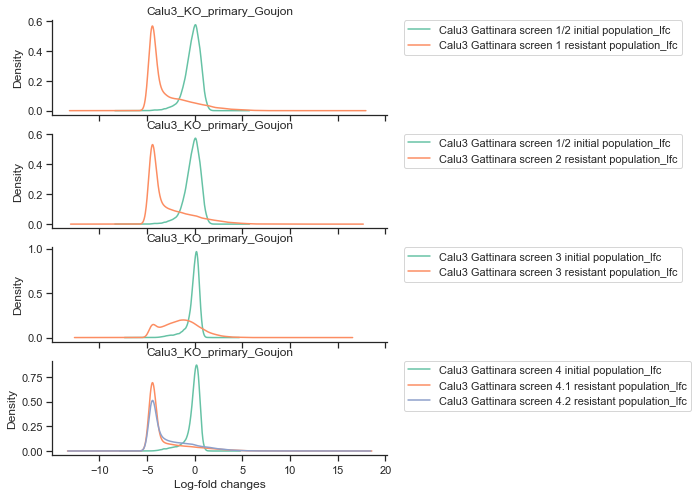

In [16]:
#Calculate log-fold change relative to pDNA
target_cols = list(lognorms.columns[3:])
pDNA_lfc = fns.calculate_lfc(lognorms,target_cols)

pair1 = [col for col in pDNA_lfc.columns if 'screen 1' in col] 
pair2 = ['Calu3 Gattinara screen 1/2 initial population_lfc', 'Calu3 Gattinara screen 2 resistant population_lfc']
pair3 = [col for col in pDNA_lfc.columns if 'screen 3' in col]
pair4 = [col for col in pDNA_lfc.columns if 'screen 4' in col]

paired_cols = (True, [pair1, pair2, pair3, pair4])
#Plot population distributions of log-fold changes 
fns.lfc_dist_plot(pDNA_lfc, paired_cols=paired_cols, filename = 'Calu3_KO_primary_Goujon', figsize = (6, 8))



### Distributions of control sets 

Calu3 Gattinara screen 1/2 initial population_lfc
Calu3 Gattinara screen 1 resistant population_lfc
Calu3 Gattinara screen 1/2 initial population_lfc
Calu3 Gattinara screen 2 resistant population_lfc
Calu3 Gattinara screen 3 initial population_lfc
Calu3 Gattinara screen 3 resistant population_lfc
Calu3 Gattinara screen 4 initial population_lfc
Calu3 Gattinara screen 4.1 resistant population_lfc
Calu3 Gattinara screen 4.2 resistant population_lfc


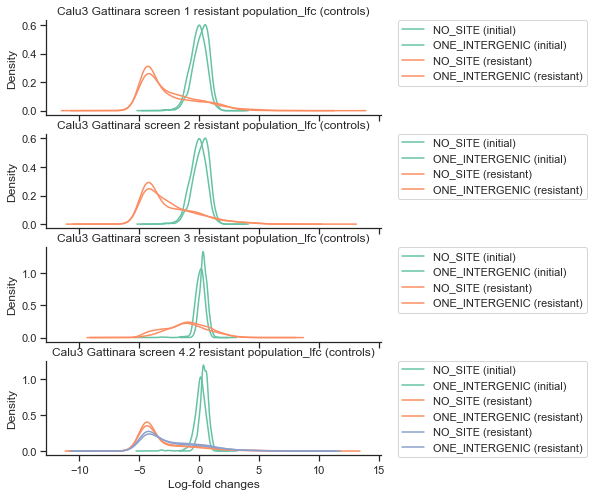

In [20]:
control_dist_plot(pDNA_lfc, paired_cols=paired_cols, initial_id='initial', res_id='resistant', 
                  control_name=['NO_SITE', 'ONE_INTERGENIC'], 
                  filename = 'Calu3_KO_primary_Goujon', figsize = (6, 8))


### ROC_AUC

Essential gene set: Hart et al., 2015 
<br>
Non-essential gene set: Hart et al., 2014 

Text(0, 0.5, 'True Positive Rate (essential)')

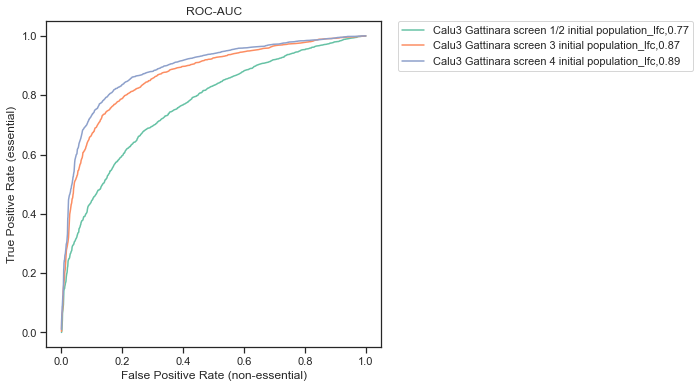

In [22]:
ess_genes, non_ess_genes = fns.get_gene_sets()
initial_cols = [col for col in pDNA_lfc.columns if 'initial' in col]

tp_genes = ess_genes.loc[:, 'Gene Symbol'].to_list()

fp_genes = non_ess_genes.loc[:, 'Gene Symbol'].to_list()

initial_roc_dict = {}
intial_roc_auc_dict = {}
for col in initial_cols:
    roc_auc, roc_df = pool.get_roc_aucs(pDNA_lfc, tp_genes, fp_genes, gene_col = 'Gene Symbol', score_col=col)
    initial_roc_dict[col] = roc_df
    intial_roc_auc_dict[col] = roc_auc

fig,ax=plt.subplots(figsize=(6,6))

for key, df in initial_roc_dict.items():
    roc_auc = intial_roc_auc_dict[key]
    ax=sns.lineplot(data=df, x='fpr',y='tpr', ci=None, label = key+',' + str(round(roc_auc,2)))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('ROC-AUC')
plt.xlabel('False Positive Rate (non-essential)')
plt.ylabel('True Positive Rate (essential)')


## Gene level analysis

### Residual z-scores

In [23]:
lfc_df = pDNA_lfc.drop('Gene Symbol', axis = 1)
lfc_df

,Guide,Calu3 Gattinara screen 1/2 initial population_lfc,Calu3 Gattinara screen 1 resistant population_lfc,Calu3 Gattinara screen 2 resistant population_lfc,Calu3 Gattinara screen 3 initial population_lfc,Calu3 Gattinara screen 3 resistant population_lfc,Calu3 Gattinara screen 4 initial population_lfc,Calu3 Gattinara screen 4.1 resistant population_lfc,Calu3 Gattinara screen 4.2 resistant population_lfc
0,AAAAAAAGGATGTATAAGTG,-1.031673,0.658336,1.004041,0.084391,-1.766630,-0.038099,-3.549213,-3.966000
1,AAAAAAATGACAGAGAACCT,-0.884750,-0.165863,-0.476637,0.156836,1.599802,0.397177,-4.299427,-0.133540
2,AAAAAACAGCTTCAACTCCG,-0.743622,0.965147,-2.543164,-0.156284,0.005239,-0.045192,-0.578332,-4.275938
3,AAAAAACCAAATCGCCACGT,-0.513007,-2.562979,0.598207,-0.143119,-0.321166,-0.576908,-4.045323,-4.045323
4,AAAAAACCACCAATAAGAGG,-0.840884,2.582122,-4.214115,-0.061038,-2.793695,0.006018,-4.214115,-2.692082
...,...,...,...,...,...,...,...,...,...
44651,TTTTGTCAAACAATCCGAAG,-0.260291,-3.107565,-4.214115,0.568937,-3.244677,0.528947,-4.098099,-4.214115
44652,TTTTTACGGTATGCTTCCAC,-1.033425,-4.205647,1.329388,0.197548,-0.442195,0.209931,-4.290640,0.551602
44653,TTTTTACGGTATGCTTCCAC,-1.033425,-4.205647,1.329388,0.197548,-0.442195,0.209931,-4.290640,0.551602
44654,TTTTTCAGCCATATATCGTA,-1.685113,-4.092047,1.871509,0.059539,0.092795,-0.113637,-4.152392,2.117604


In [25]:
# run_guide_residuals(lfc_df.drop_duplicates(), cols)
residuals_lfcs, all_model_info, model_fit_plots = fns.run_guide_residuals(lfc_df, paired_cols=paired_cols[1])
residuals_lfcs


                                            modified  \
0  Calu3 Gattinara screen 1 resistant population_lfc   
1  Calu3 Gattinara screen 2 resistant population_lfc   
2  Calu3 Gattinara screen 3 resistant population_lfc   
3  Calu3 Gattinara screen 4.1 resistant populatio...   
4  Calu3 Gattinara screen 4.2 resistant populatio...   

                                         unperturbed  
0  Calu3 Gattinara screen 1/2 initial population_lfc  
1  Calu3 Gattinara screen 1/2 initial population_lfc  
2    Calu3 Gattinara screen 3 initial population_lfc  
3    Calu3 Gattinara screen 4 initial population_lfc  
4    Calu3 Gattinara screen 4 initial population_lfc  


,Guide,condition,residual,residual_z,unperturbed,lfc,lfc_reference
0,AAAAAAAGGATGTATAAGTG,Calu3 Gattinara screen 1 resistant population_lfc,3.951450,1.825091,Calu3 Gattinara screen 1/2 initial population_lfc,0.658336,-1.031673
1,AAAAAAAGGATGTATAAGTG,Calu3 Gattinara screen 2 resistant population_lfc,4.255062,1.953632,Calu3 Gattinara screen 1/2 initial population_lfc,1.004041,-1.031673
2,AAAAAAATGACAGAGAACCT,Calu3 Gattinara screen 1 resistant population_lfc,3.063696,1.415056,Calu3 Gattinara screen 1/2 initial population_lfc,-0.165863,-0.884750
3,AAAAAAATGACAGAGAACCT,Calu3 Gattinara screen 2 resistant population_lfc,2.692171,1.236060,Calu3 Gattinara screen 1/2 initial population_lfc,-0.476637,-0.884750
4,AAAAAACAGCTTCAACTCCG,Calu3 Gattinara screen 1 resistant population_lfc,4.134883,1.909814,Calu3 Gattinara screen 1/2 initial population_lfc,0.965147,-0.743622
...,...,...,...,...,...,...,...
204815,TTTTGTCAAACAATCCGAAG,Calu3 Gattinara screen 4.2 resistant populatio...,-2.110852,-0.999453,Calu3 Gattinara screen 4 initial population_lfc,-4.214115,0.528947
204816,TTTTTACGGTATGCTTCCAC,Calu3 Gattinara screen 4.1 resistant populatio...,-1.256571,-0.611434,Calu3 Gattinara screen 4 initial population_lfc,-4.290640,0.209931
204817,TTTTTACGGTATGCTTCCAC,Calu3 Gattinara screen 4.2 resistant populatio...,3.052722,1.445413,Calu3 Gattinara screen 4 initial population_lfc,0.551602,0.209931
204818,TTTTTCAGCCATATATCGTA,Calu3 Gattinara screen 4.1 resistant populatio...,-0.825017,-0.401444,Calu3 Gattinara screen 4 initial population_lfc,-4.152392,-0.113637


In [30]:
guide_mapping = pool.group_pseudogenes(reads[['Guide', 'Gene Symbol']], pseudogene_size=2, gene_col='Gene Symbol', control_regex=['NO_SITE','ONE_INTERGENIC_SITE'])
guide_mapping

,Guide,Gene Symbol
0,AAAAAAAGGATGTATAAGTG,ZNF626
1,AAAAAAATGACAGAGAACCT,TMEM218
2,AAAAAACAGCTTCAACTCCG,PDILT
3,AAAAAACCAAATCGCCACGT,ONE_INTERGENIC_186
4,AAAAAACCACCAATAAGAGG,C2orf74
...,...,...
44651,TTTTGTCAAACAATCCGAAG,INACTIVE_4T_9
44652,TTTTTACGGTATGCTTCCAC,ONE_INTERGENIC_15
44653,TTTTTACGGTATGCTTCCAC,INACTIVE_5T_10
44654,TTTTTCAGCCATATATCGTA,ONE_INTERGENIC_169


In [31]:
gene_residuals = anchors.get_gene_residuals(residuals_lfcs.drop_duplicates(), guide_mapping)
gene_residuals

,condition,Gene Symbol,guides,avg_lfc,avg_lfc_reference,residual_zscore,p_value,fdr_bh
0,Calu3 Gattinara screen 1 resistant population_lfc,A1BG,2,-2.612607,0.382855,0.066861,0.946693,0.988926
1,Calu3 Gattinara screen 1 resistant population_lfc,A1BG-AS1,1,-4.329915,0.360981,-0.741498,0.458392,0.912847
2,Calu3 Gattinara screen 1 resistant population_lfc,A1CF,2,-4.322811,-0.379417,-0.845513,0.397825,0.912847
3,Calu3 Gattinara screen 1 resistant population_lfc,A2M,2,-4.394634,-0.753447,-0.796968,0.425470,0.912847
4,Calu3 Gattinara screen 1 resistant population_lfc,A2ML1,2,-2.800072,0.420147,-0.070604,0.943713,0.988239
...,...,...,...,...,...,...,...,...
108640,Calu3 Gattinara screen 4.2 resistant populatio...,ZYG11A,2,-1.873615,-0.017083,0.591088,0.554462,0.982806
108641,Calu3 Gattinara screen 4.2 resistant populatio...,ZYG11B,2,-3.627562,0.010235,-0.600931,0.547886,0.982806
108642,Calu3 Gattinara screen 4.2 resistant populatio...,ZYX,2,-2.013024,0.438835,0.136553,0.891384,0.999539
108643,Calu3 Gattinara screen 4.2 resistant populatio...,ZZEF1,2,-3.571071,0.111882,-0.643221,0.520081,0.982595


In [32]:
gene_residual_sheet = fns.format_gene_residuals(gene_residuals, guide_min = 2, guide_max = 4)

guide_residual_sheet = pd.merge(guide_mapping, residuals_lfcs.drop_duplicates(), on = 'Guide', how = 'inner')
guide_residual_sheet

['Calu3 Gattinara screen 1 resistant population_lfc', 'Calu3 Gattinara screen 2 resistant population_lfc', 'Calu3 Gattinara screen 4.2 resistant population_lfc', 'Calu3 Gattinara screen 3 resistant population_lfc', 'Calu3 Gattinara screen 4.1 resistant population_lfc']
Calu3 Gattinara screen 1 resistant population_lfc
Calu3 Gattinara screen 2 resistant population_lfc
Calu3 Gattinara screen 4.2 resistant population_lfc
Calu3 Gattinara screen 3 resistant population_lfc
Calu3 Gattinara screen 4.1 resistant population_lfc


,Guide,Gene Symbol,condition,residual,residual_z,unperturbed,lfc,lfc_reference
0,AAAAAAAGGATGTATAAGTG,ZNF626,Calu3 Gattinara screen 1 resistant population_lfc,3.951450,1.825091,Calu3 Gattinara screen 1/2 initial population_lfc,0.658336,-1.031673
1,AAAAAAAGGATGTATAAGTG,ZNF626,Calu3 Gattinara screen 2 resistant population_lfc,4.255062,1.953632,Calu3 Gattinara screen 1/2 initial population_lfc,1.004041,-1.031673
2,AAAAAAAGGATGTATAAGTG,ZNF626,Calu3 Gattinara screen 3 resistant population_lfc,-0.503433,-0.290388,Calu3 Gattinara screen 3 initial population_lfc,-1.766630,0.084391
3,AAAAAAAGGATGTATAAGTG,ZNF626,Calu3 Gattinara screen 4.1 resistant populatio...,-0.286311,-0.139316,Calu3 Gattinara screen 4 initial population_lfc,-3.549213,-0.038099
4,AAAAAAAGGATGTATAAGTG,ZNF626,Calu3 Gattinara screen 4.2 resistant populatio...,-1.188465,-0.562718,Calu3 Gattinara screen 4 initial population_lfc,-3.966000,-0.038099
...,...,...,...,...,...,...,...,...
223275,TTTTTCAGCCATATATCGTA,INACTIVE_5T_11,Calu3 Gattinara screen 1 resistant population_lfc,-0.501735,-0.231741,Calu3 Gattinara screen 1/2 initial population_lfc,-4.092047,-1.685113
223276,TTTTTCAGCCATATATCGTA,INACTIVE_5T_11,Calu3 Gattinara screen 2 resistant population_lfc,5.476298,2.514340,Calu3 Gattinara screen 1/2 initial population_lfc,1.871509,-1.685113
223277,TTTTTCAGCCATATATCGTA,INACTIVE_5T_11,Calu3 Gattinara screen 3 resistant population_lfc,1.391903,0.802871,Calu3 Gattinara screen 3 initial population_lfc,0.092795,0.059539
223278,TTTTTCAGCCATATATCGTA,INACTIVE_5T_11,Calu3 Gattinara screen 4.1 resistant populatio...,-0.825017,-0.401444,Calu3 Gattinara screen 4 initial population_lfc,-4.152392,-0.113637
